In [83]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [84]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [85]:
import psycopg2
import pandas as pd
import psycopg2.extras
import seaborn as sns
import numpy as np

In [86]:
import matplotlib.pyplot as plt

In [87]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "chanyeol",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [88]:
con = PostgresConnection().getConnection()

successfully connected to database


# Q1: Find the division wise total_sale_price joining fact table and respective dimension table

In [89]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM star_schema.fact_table t " \
              "JOIN star_schema.store_dim s on s.store_key=t.store_key " \
                "GROUP BY CUBE(s.division) " \
                "ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [90]:
records

[('BARISAL', Decimal('7520343.75')),
 ('CHITTAGONG', Decimal('19763595.00')),
 ('DHAKA', Decimal('40764619.75')),
 ('KHULNA', Decimal('11311610.50')),
 ('RAJSHAHI', Decimal('12099196.00')),
 ('RANGPUR', Decimal('8429836.50')),
 ('SYLHET', Decimal('5512234.25')),
 (None, Decimal('105401435.75'))]

In [91]:
df_q1 = pd.DataFrame(records, columns=['division', 'sales'])
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25
7,None,105401435.75


In [92]:
df_q1 =df_q1.drop(7)

In [93]:
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [94]:
def changetype(x):
    x['sales']=x['sales'].astype('float64')  

In [95]:
changetype(df_q1)

In [96]:
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [97]:
df_q1=df_q1.set_index(['division'])
df_q1

,sales
division,
BARISAL,7520343.75
CHITTAGONG,19763595.00
DHAKA,40764619.75
KHULNA,11311610.50
RAJSHAHI,12099196.00
RANGPUR,8429836.50
SYLHET,5512234.25


<Axes: ylabel='sales'>

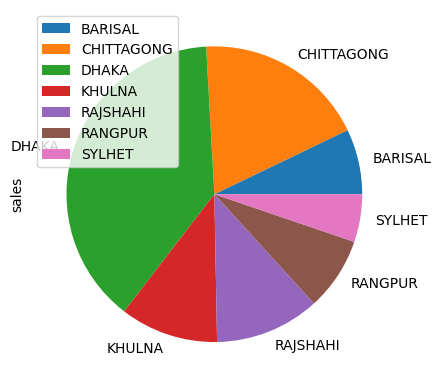

In [98]:
df_q1.plot.pie(y='sales')

<Axes: xlabel='division'>

<Figure size 500x200 with 0 Axes>

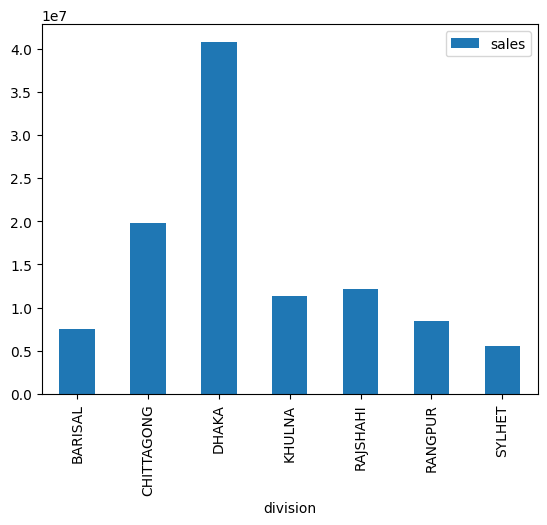

In [99]:
plt.figure(figsize=(5,2))
df_q1.plot.bar(y='sales')

# Q1. Find the year wise total_sale_price joining fact table and respective dimension table 

In [100]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, SUM(t.total_price) " \
              "FROM star_schema.fact_table t " \
              "JOIN star_schema.time_dim s on s.time_key=t.time_key " \
                "GROUP BY CUBE(s.year) " \
                "ORDER BY s.year "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [101]:
df = pd.DataFrame(records, columns=['year', 'sales'])
df

,year,sales
0,2014.0,14334731.25
1,2015.0,15095720.25
2,2016.0,14976508.25
3,2017.0,15015806.00
4,2018.0,15108197.25
5,2019.0,14949510.25
6,2020.0,15037190.25
7,2021.0,883772.25
8,NaN,105401435.75


In [102]:
df =df.drop(8)
df

,year,sales
0,2014.0,14334731.25
1,2015.0,15095720.25
2,2016.0,14976508.25
3,2017.0,15015806.00
4,2018.0,15108197.25
5,2019.0,14949510.25
6,2020.0,15037190.25
7,2021.0,883772.25


In [103]:
changetype(df)
df

,year,sales
0,2014.0,14334731.25
1,2015.0,15095720.25
2,2016.0,14976508.25
3,2017.0,15015806.00
4,2018.0,15108197.25
5,2019.0,14949510.25
6,2020.0,15037190.25
7,2021.0,883772.25


<Axes: title={'center': 'year wise sales'}, xlabel='year', ylabel='sales'>

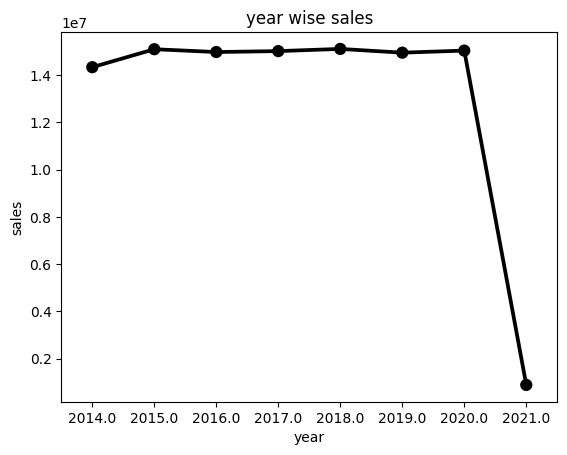

In [104]:
plt.xlabel('year')
plt.ylabel('sales')
plt.title('year wise sales')
sns.pointplot(data=df,x='year',y='sales',color='black')

# Q1. Find the district wise total_sale_price joining fact table and respective dimension table 

In [117]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.district, SUM(t.total_price) " \
              "FROM star_schema.fact_table t " \
              "JOIN star_schema.store_dim s on s.store_key=t.store_key " \
                "GROUP BY CUBE(s.district) " \
                "ORDER BY s.district "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('BAGERHAT', Decimal('1307651.00')),
 ('BANDARBAN', Decimal('995360.75')),
 ('BARGUNA', Decimal('869041.00')),
 ('BARISAL', Decimal('2897237.75')),
 ('BHOLA', Decimal('1012205.75')),
 ('BOGRA', Decimal('1716452.75')),
 ('BRAHMANBARIA', Decimal('1328234.25')),
 ('CHANDPUR', Decimal('1153276.75')),
 ('CHAPAI NABABGANJ', Decimal('739447.50')),
 ('CHITTAGONG', Decimal('7292985.50')),
 ('CHUADANGA', Decimal('563909.75')),
 ('COMILLA', Decimal('2286898.25')),
 ("COX'S BAZAR", Decimal('1188128.75')),
 ('DHAKA', Decimal('23597621.00')),
 ('DINAJPUR', Decimal('1871005.75')),
 ('FARIDPUR', Decimal('1287383.75')),
 ('FENI', Decimal('847873.50')),
 ('GAIBANDHA', Decimal('997077.75')),
 ('GAZIPUR', Decimal('722286.25')),
 ('GOPALGANJ', Decimal('731312.75')),
 ('HABIGANJ', Decimal('1153998.00')),
 ('JAMALPUR', Decimal('1009760.00')),
 ('JESSORE', Decimal('1132590.50')),
 ('JHALOKATI', Decimal('570807.25')),
 ('JHENAIDAH', Decimal('869991.25')),
 ('JOYPURHAT', Decimal('735378.50')),
 ('KHAGRACHHARI'

In [118]:
df_q1 = pd.DataFrame(records, columns=['district', 'sales'])
df_q1

,district,sales
0,BAGERHAT,1307651.00
1,BANDARBAN,995360.75
2,BARGUNA,869041.00
3,BARISAL,2897237.75
4,BHOLA,1012205.75
...,...,...
60,SUNAMGANJ,1593774.00
61,SYLHET,1727717.25
62,TANGAIL,1774650.25
63,THAKURGAON,729934.25


In [119]:
df_q1 = df_q1.dropna()
changetype(df_q1)
df_q1.dtypes

C:\Users\User\AppData\Local\Temp\ipykernel_5720\369198803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sales']=x['sales'].astype('float64')


district     object
sales       float64
dtype: object

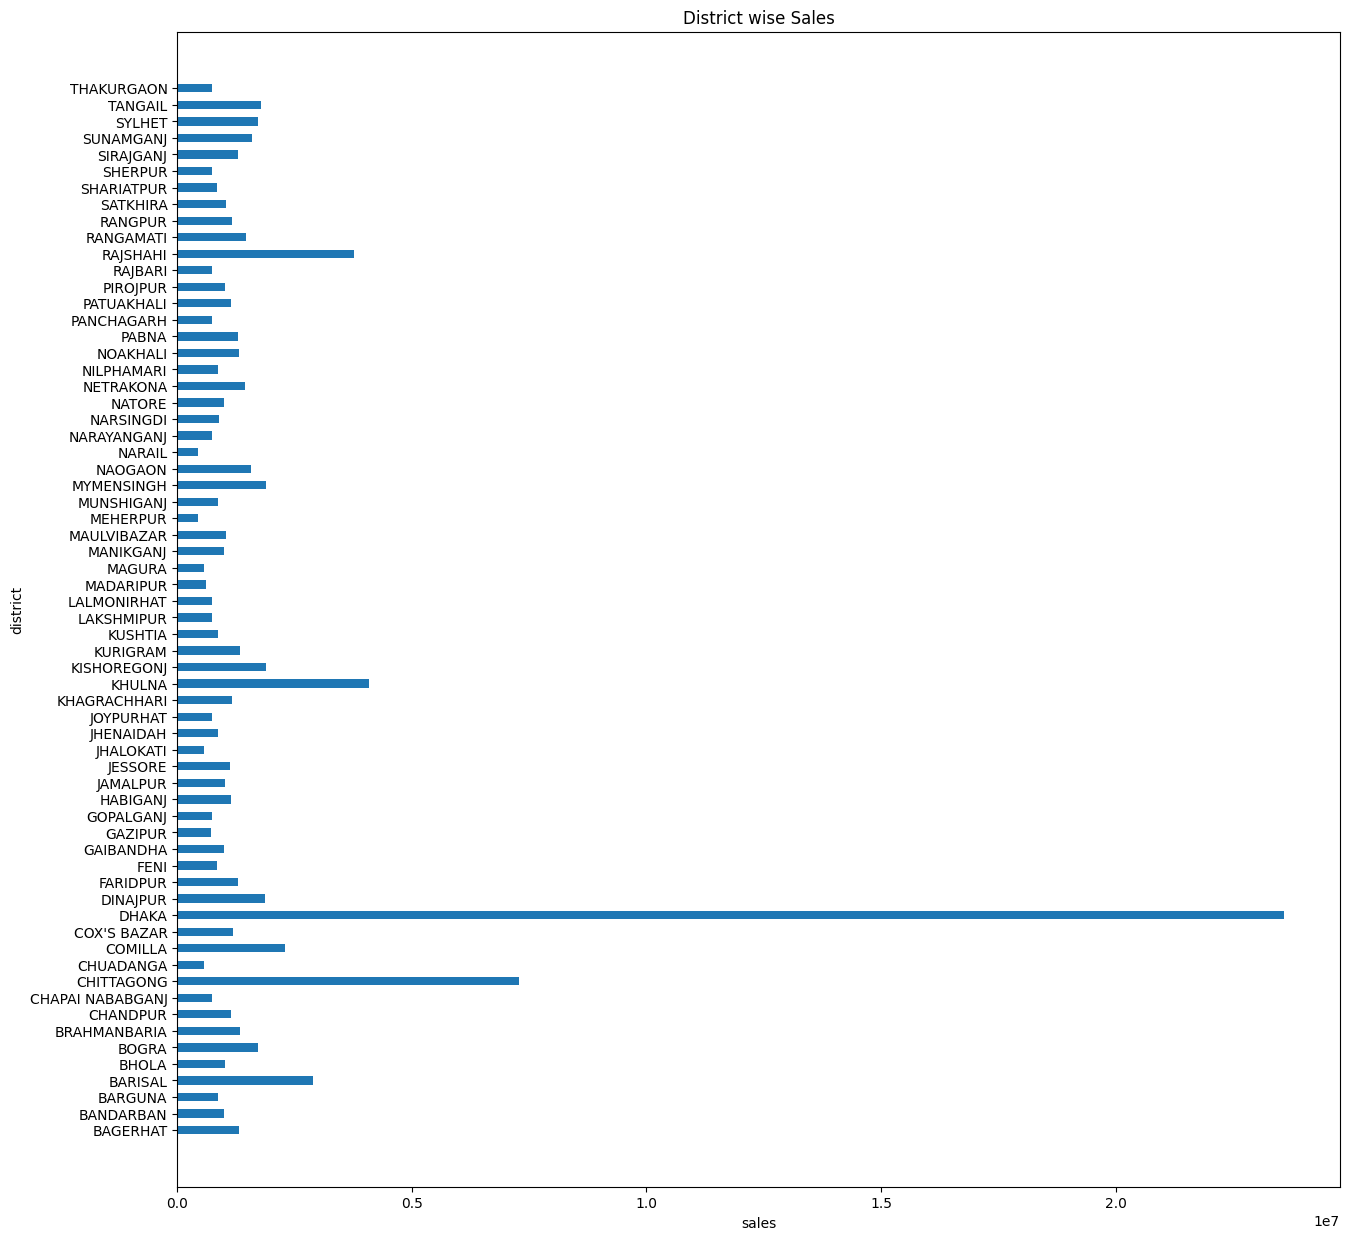

In [120]:
plt.figure(figsize=(15,15))
barlist=plt.barh(df_q1['district'],df_q1['sales'],height=0.5)
plt.title('District wise Sales')
plt.xlabel('sales')
plt.ylabel('district')
plt.show()

# Q1. Find the month wise total_sale_price joining fact table and respective dimension table 

In [105]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.month, SUM(t.total_price) " \
              "FROM star_schema.fact_table t " \
              "JOIN star_schema.time_dim s on s.time_key=t.time_key " \
                "GROUP BY CUBE(s.month) " \
                "ORDER BY s.month "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [106]:
df = pd.DataFrame(records, columns=['month', 'sales'])
df

,month,sales
0,1.0,9042244.00
1,2.0,8073877.50
2,3.0,8939152.00
3,4.0,8504634.75
4,5.0,9078002.50
5,6.0,8556853.00
6,7.0,9046580.00
7,8.0,8929475.25
8,9.0,8724326.50
9,10.0,8902783.75


<Axes: title={'center': 'month wise sales'}, xlabel='month', ylabel='sales'>

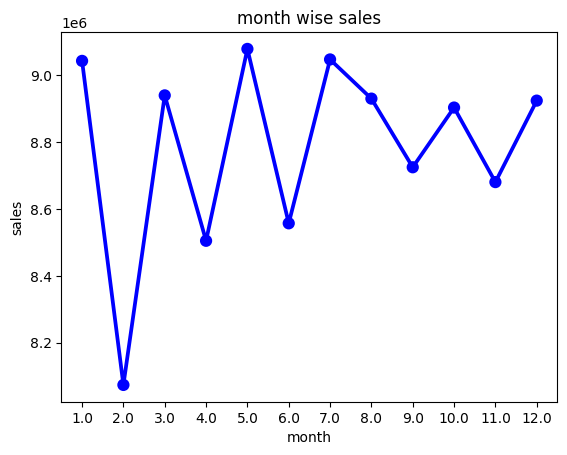

In [107]:
df =df.drop(12)  
changetype(df)
plt.xlabel('month')
plt.ylabel('sales')
plt.title('month wise sales')
sns.pointplot(data=df,x='month',y='sales',color='blue')

# Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table

In [121]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.name, SUM(t.total_price) " \
              "FROM star_schema.fact_table t " \
              "JOIN star_schema.customer_dim s on s.customer_key=t.customer_key " \
                "GROUP BY CUBE(s.name) " \
                "ORDER BY s.name "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('-', Decimal('20643.50')),
 ('aafreen fatima', Decimal('11174.75')),
 ('aafrin', Decimal('22136.75')),
 ('aafrin @ dolly', Decimal('23529.75')),
 ('aaftaab husan', Decimal('9682.00')),
 ('aakanksha', Decimal('11469.00')),
 ('aaliya', Decimal('21663.25')),
 ('aamina', Decimal('12649.25')),
 ('aamir', Decimal('10134.00')),
 ('aamir hussain', Decimal('10892.50')),
 ('aamod & pramod', Decimal('12280.25')),
 ('aamrin jahan', Decimal('11622.00')),
 ('aanamika misra', Decimal('8929.25')),
 ('aanchal', Decimal('35703.50')),
 ('aanik with her son', Decimal('8568.25')),
 ('aansi devi', Decimal('9909.00')),
 ('aanya @ china', Decimal('11443.50')),
 ('aaradhana @ priyanka', Decimal('11469.25')),
 ('aarifa bano', Decimal('11295.75')),
 ('aarifun bivi', Decimal('13139.25')),
 ('aarti', Decimal('661675.25')),
 ('aarti @ kajal', Decimal('12108.50')),
 ('aarti @ noni', Decimal('12335.50')),
 ('aarti bunkar', Decimal('13661.75')),
 ('aarti devi', Decimal('26537.00')),
 ('aarti diwakar', Decimal('10892

In [122]:
df = pd.DataFrame(records, columns=['name', 'sales'])
df = df.dropna()
changetype(df)
df.dtypes

name      object
sales    float64
dtype: object

In [125]:
df2=df
df2.sort_values(by="sales",inplace=True,ascending=False)
df2

,name,sales
2524,pooja,2109800.75
1201,jyoti,1331696.25
2272,neha,996121.00
4181,sunita,915543.75
2563,poonam,914285.25
...,...,...
74,ahsamin @ juhi,7554.25
3854,smt sujata,7496.25
1941,meenaxi,7113.50
397,bahwana,7105.50


In [126]:
df=df2[0:10]

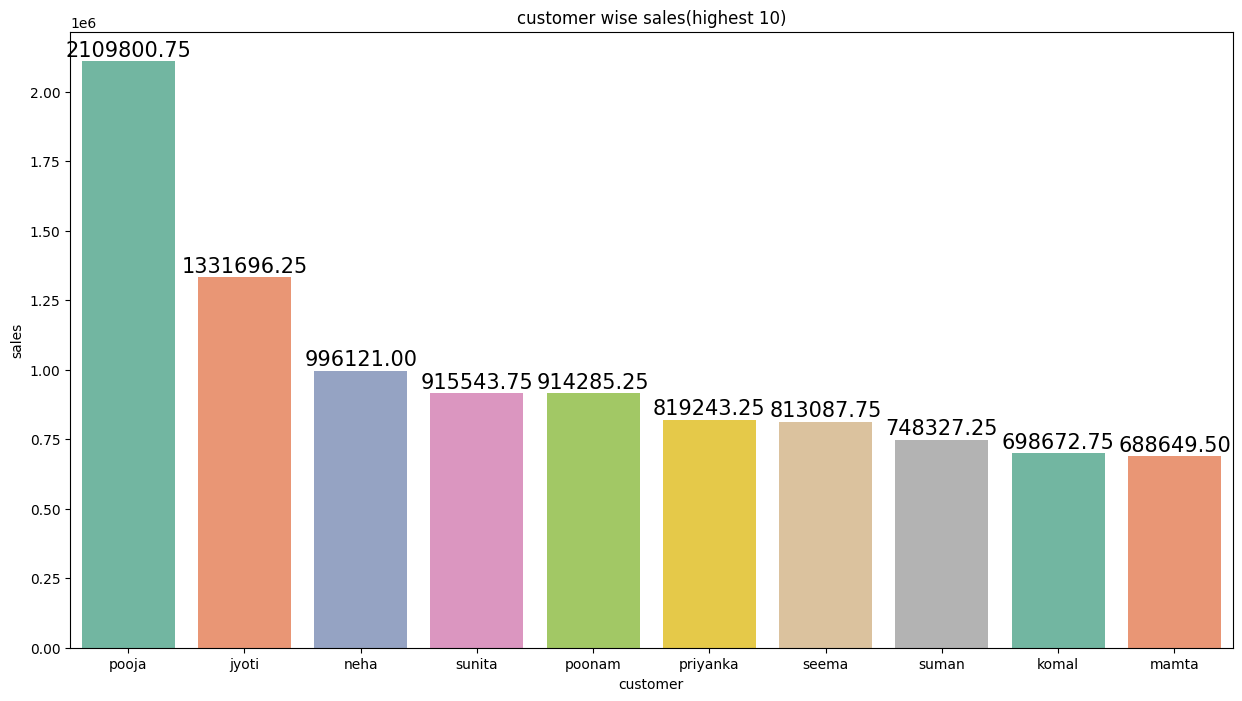

In [127]:
#Creating bar plot
f=plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
plots=sns.barplot(x=df['name'],y=df['sales'],palette='Set2')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width()/2,
                   bar.get_height()),ha='center',va='center',
                   size=15,xytext=(0, 8),
                   textcoords='offset points')
    
                   
                  
plt.xlabel('customer')
plt.ylabel('sales')
plt.title('customer wise sales(highest 10)')                        
plt.show() 

In [128]:
x=df.nlargest(1,'sales').values
print('Customer '+str(x[::,0])+' has the highest purchase of '+str(x[::,1])+' taka')

Customer ['pooja'] has the highest purchase of [2109800.75] taka


In [129]:
#bankwise
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.bank_name, SUM(t.total_price) " \
              "FROM star_schema.fact_table t " \
              "JOIN star_schema.trans_dim s on s.payment_key=t.payment_key " \
                "GROUP BY CUBE(s.bank_name) " \
                "ORDER BY s.bank_name "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('AB Bank Limited', Decimal('2728515.50')),
 ('Bangladesh Commerce Bank Limited', Decimal('2730999.25')),
 ('Bank Asia Limited', Decimal('2687142.75')),
 ('Bengal Commercial Bank Ltd', Decimal('2704554.25')),
 ('Bkash', Decimal('2689352.50')),
 ('BRAC Bank Limited', Decimal('2705795.75')),
 ('Citizens Bank Limited', Decimal('2723215.25')),
 ('City Bank Limited', Decimal('2713952.50')),
 ('Community Bank Bangladesh Limited', Decimal('2685751.50')),
 ('Dhaka Bank Limited', Decimal('2728366.00')),
 ('Dutch-Bangla Bank Limited', Decimal('2692435.25')),
 ('Eastern Bank Limited', Decimal('2687182.25')),
 ('IFIC Bank Limited', Decimal('2699759.75')),
 ('Jamuna Bank Limited', Decimal('2689886.50')),
 ('Meghna Bank Limited', Decimal('2700528.50')),
 ('Mercantile Bank Limited', Decimal('2676578.50')),
 ('Midland Bank Limited', Decimal('2688430.25')),
 ('Modhumoti Bank Limited', Decimal('2715279.00')),
 ('Mutual Trust Bank Limited', Decimal('2670030.50')),
 ('Nagad', Decimal('2699554.50')),
 ('N

In [130]:
df = pd.DataFrame(records, columns=['bank_name', 'sales'])
df = df.dropna()
changetype(df)

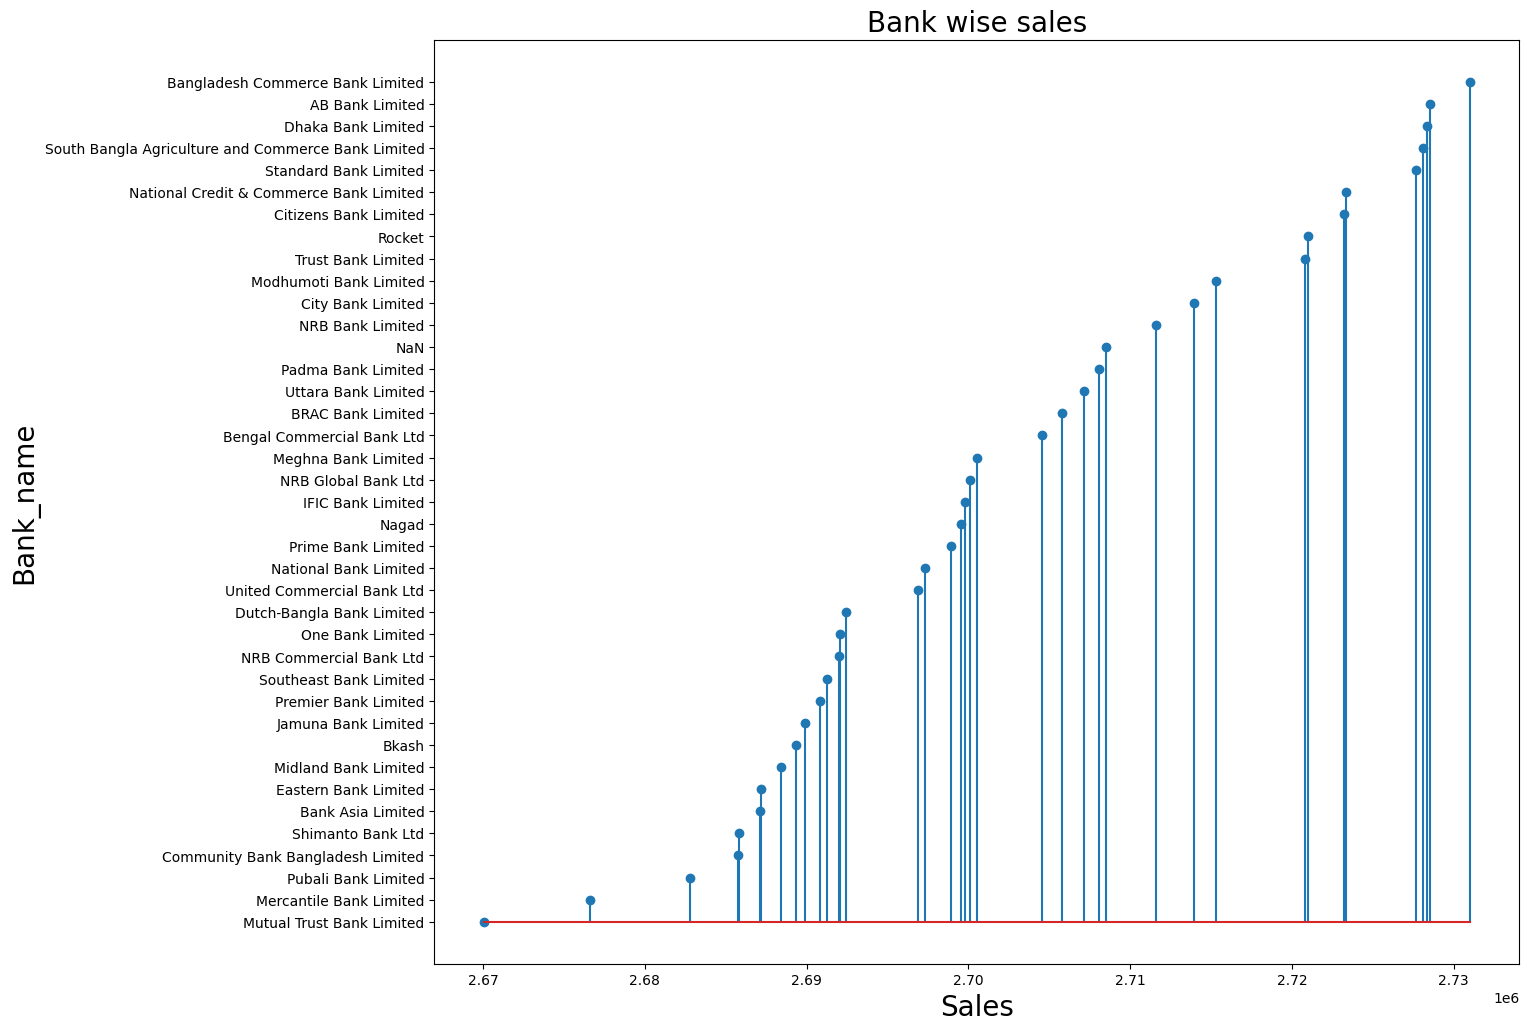

In [131]:
plt.figure(figsize=(14,12))
df.sort_values(by=['sales'],inplace=True,ascending=True)
plt.xlabel('Sales',fontsize=20)
plt.ylabel('Bank_name',fontsize=20)
plt.title('Bank wise sales',fontsize=20)
plt.stem(df['sales'],df['bank_name'])
plt.show()

In [134]:
#transactionwise
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.trans_type, SUM(t.total_price) " \
              "FROM star_schema.fact_table t " \
              "JOIN star_schema.trans_dim s on s.payment_key=t.payment_key " \
                "GROUP BY CUBE(s.trans_type) " \
                "ORDER BY s.trans_type "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('card', Decimal('94583038.50')),
 ('cash', Decimal('2708515.75')),
 ('mobile', Decimal('8109881.50')),
 (None, Decimal('105401435.75'))]

<Axes: ylabel='sales'>

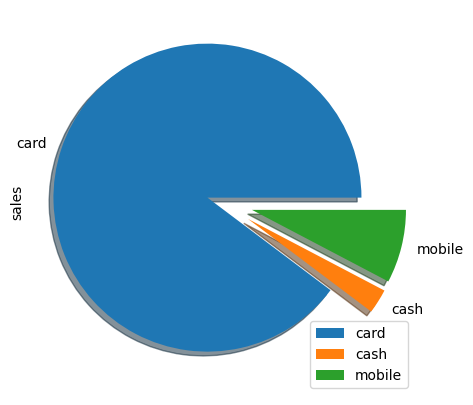

In [135]:
df = pd.DataFrame(records, columns=['trans_type', 'sales'])
df = df.dropna()
changetype(df)
df=df.set_index(['trans_type'])
myexplode=[0.1,0.2,0.2]
df.plot.pie(y='sales',figsize=(5,5),shadow=True,explode=myexplode)

# Q3: Total sales in Barisal

In [141]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM star_schema.fact_table t " \
              "JOIN star_schema.store_dim s on s.store_key=t.store_key " \
                "WHERE s.division='BARISAL' "\
                "GROUP BY CUBE(s.division) " \
                "ORDER BY s.division"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('BARISAL', Decimal('7520343.75')), (None, Decimal('7520343.75'))]

In [142]:
df = pd.DataFrame(records, columns=['division', 'sales'])
df = df.dropna()
changetype(df)
df=df.set_index(['division'])
df

,sales
division,
BARISAL,7520343.75


# Q4: Total sales in 2015


In [143]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, SUM(t.total_price) " \
              "FROM star_schema.fact_table t " \
              "JOIN star_schema.time_dim s on s.time_key=t.time_key " \
                "WHERE s.year='2015' "\
                "GROUP BY CUBE(s.year) " \
                "ORDER BY s.year"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[(2015, Decimal('15095720.25')), (None, Decimal('15095720.25'))]

In [144]:
df = pd.DataFrame(records, columns=['year', 'sales'])
df = df.dropna()
changetype(df)
df=df.set_index(['year'])
df

,sales
year,
2015.0,15095720.25


# Q5: Total sales of Barisal in 2015

In [145]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s2.division,s1.year, SUM(t.total_price) " \
              "FROM star_schema.fact_table t " \
              "JOIN star_schema.time_dim s1 on s1.time_key=t.time_key " \
                "JOIN star_schema.store_dim s2 on s2.store_key=t.store_key " \
                "WHERE s1.year=2015 and s2.division='BARISAL'"\
                "GROUP BY CUBE(s2.division,s1.year) " \
                "ORDER BY (s2.division,s1.year)"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('BARISAL', 2015, Decimal('1076902.75')),
 ('BARISAL', None, Decimal('1076902.75')),
 (None, 2015, Decimal('1076902.75')),
 (None, None, Decimal('1076902.75'))]

In [146]:
df = pd.DataFrame(records, columns=['division','year', 'sales'])
df = df.dropna()
changetype(df)
df=df.set_index(['year'])
df

,division,sales
year,,
2015.0,BARISAL,1076902.75


# Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

    S1-> item1 -> quantity_sales

    S1-> item2 -> quantity_sales

    S1-> item3 -> quantity_sales

In [191]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT sd.store_key,id.item_name, SUM(t.quantity) " \
              "FROM star_schema.fact_table t " \
              "JOIN star_schema.item_dim id on id.item_key=t.item_key " \
                "JOIN star_schema.store_dim sd on sd.store_key=t.store_key " \
                "GROUP BY CUBE(sd.store_key,id.item_name) " \
                "ORDER BY sd.store_key,SUM(t.quantity) DESC"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('S0001', None, Decimal('8169')),
 ('S0001', 'Pepsi - 12 oz cans', Decimal('92')),
 ('S0001', 'Muscle Milk Protein Shake Van. 11oz', Decimal('90')),
 ('S0001', 'Hefty Supreme Foam Plates 6 inch', Decimal('78')),
 ('S0001', 'Waterloo Sparkling Lime 12oz', Decimal('70')),
 ('S0001', 'Njoy Sugar Canister 22 oz', Decimal('69')),
 ('S0001', 'Vita Coconut Water 10oz ', Decimal('68')),
 ('S0001', 'Muscle Milk Protein Shake Strbry. 11oz', Decimal('67')),
 ('S0001', 'Sprite - 12 oz cans', Decimal('64')),
 ('S0001', 'Cheez It White Cheddar 1.5 oz', Decimal('63')),
 ('S0001', 'Sargento Bal. Breaks (fruit, nut, cheese)', Decimal('62')),
 ('S0001', 'Dixie Perfecttouch Paper Cups 12oz', Decimal('61')),
 ('S0001', 'Hershey Chocoalte Minatures Assort.', Decimal('60')),
 ('S0001', 'A&W Root Beer - 12 oz cans', Decimal('60')),
 ('S0001', 'Dark Chocolate Mint Patties', Decimal('60')),
 ('S0001', 'Nature Valley Sweet/Salty Almond Bars      ', Decimal('59')),
 ('S0001', 'Large Trash Bags Black 33 gal', De

In [192]:
df = pd.DataFrame(records, columns=['store_id','item', 'quantity'])
df = df.dropna()
top3=df.groupby('store_id').head(3)
top3.head(20)

,store_id,item,quantity
1,S0001,Pepsi - 12 oz cans,92
2,S0001,Muscle Milk Protein Shake Van. 11oz,90
3,S0001,Hefty Supreme Foam Plates 6 inch,78
259,S0002,Planters Nut-trition 1.5 oz,83
260,S0002,Altoids Small Packs Variety,80
261,S0002,Muscle Milk Protein Shake Van. 11oz,78
518,S0003,Sprite - 12 oz cans,122
519,S0003,Diet Coke - 12 oz cans,109
520,S0003,Muscle Milk Protein Shake Van. 11oz,76
777,S0004,Kind Bars Variety Pack 1.4 oz,79


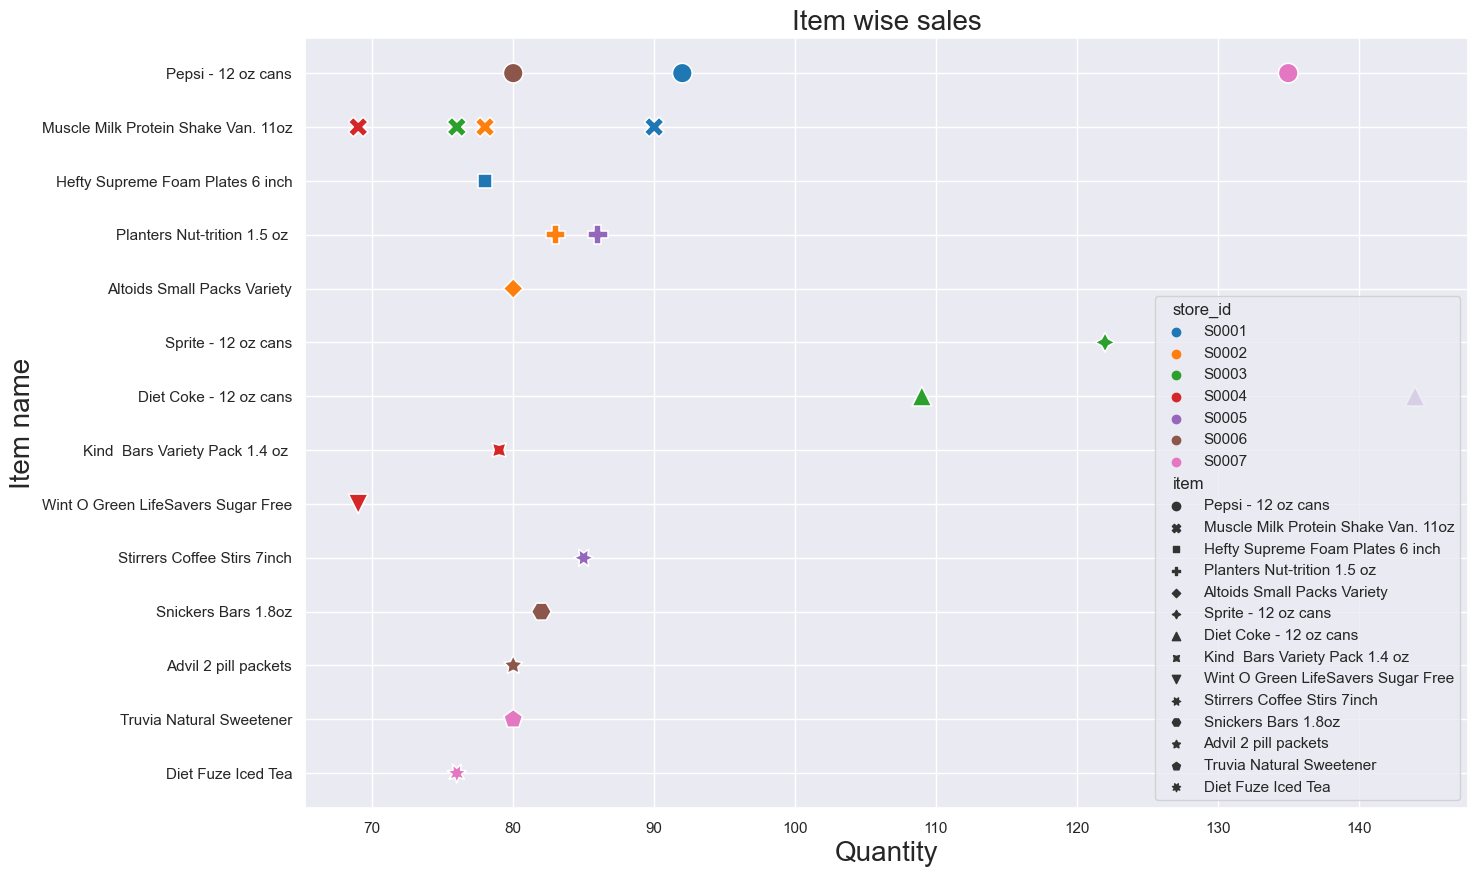

In [193]:
top_=top3[0:21]
plt.figure(figsize=(15,10))
plt.title('Item wise sales',fontsize=20)
plt.ylabel('Item name',fontsize=20)
plt.xlabel('Quantity',fontsize=20)
sns.scatterplot(data=top_,x="quantity",y="item",hue="store_id",palette="tab10",s=200,style="item")
sns.set(font_scale=2)

<Axes: title={'center': 'Store wise Top 3 Items Sales'}, xlabel='store_id', ylabel='quantity'>

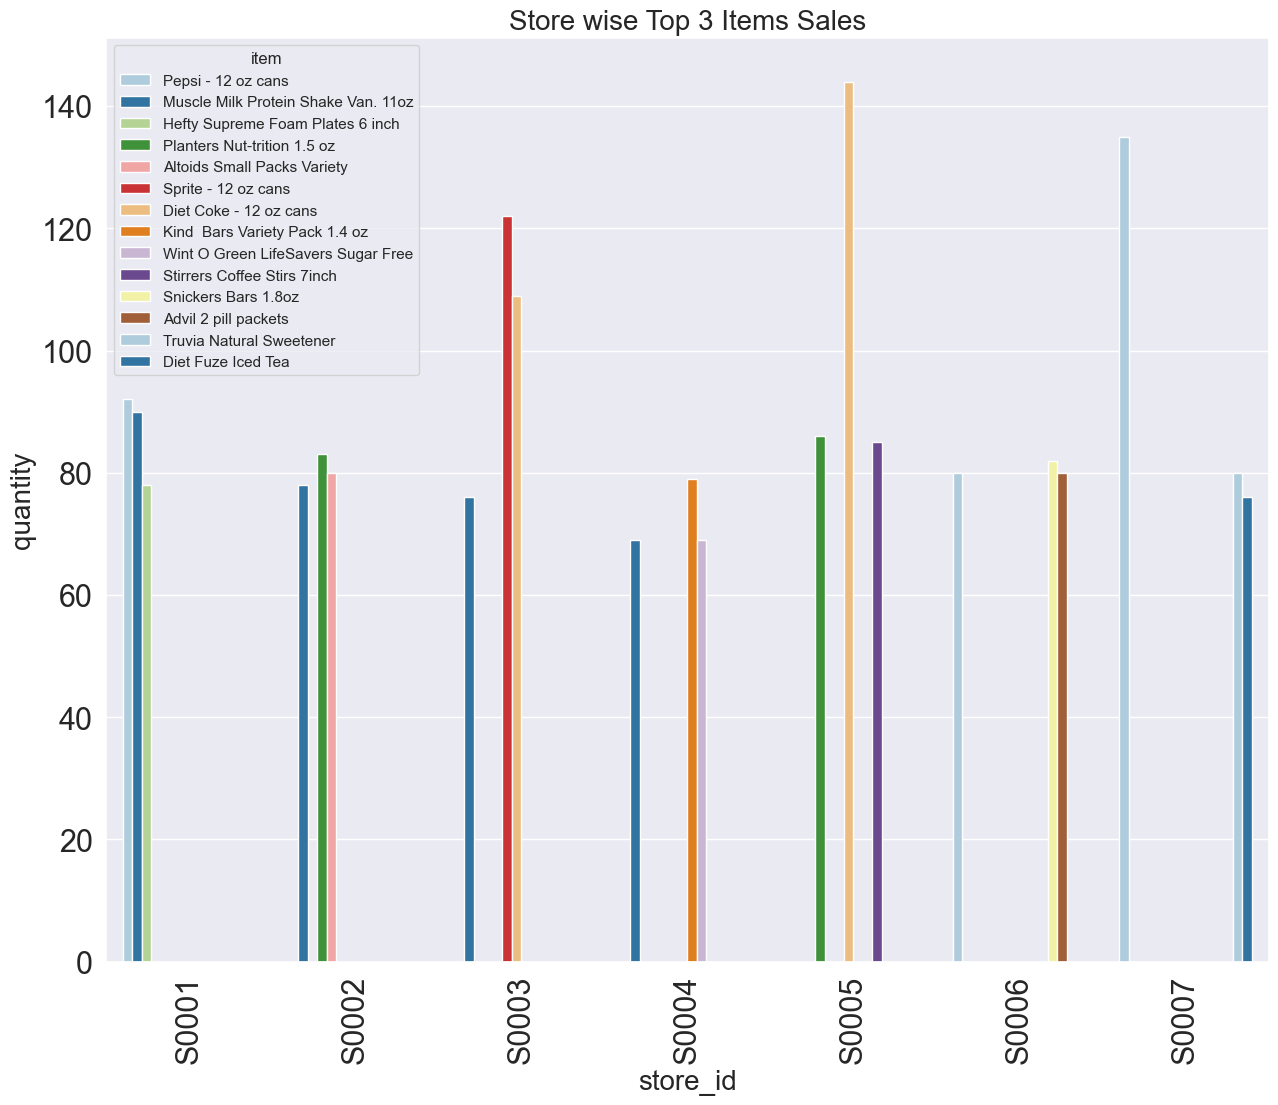

In [194]:
a_dims=(15,12)
fig,ax=plt.subplots(figsize=a_dims)
sns.set(font_scale=3)
sns.set_context("notebook")
plt.title('Store wise Top 3 Items Sales',fontsize=20)
plt.ylabel('Store_id',fontsize=20)
plt.xlabel('Quantity',fontsize=20)
plt.xticks(rotation=90)
sns.barplot(x=top_['store_id'],y=top_['quantity'],hue=top_['item'],ax=ax,palette='Paired')

# Q7: What products have been sold through card or mobile since X days?

    input: X = 5 days

    output: [item1, item2, item3, ...........]

In [155]:
x=int(input('Enter number of days: '))

Enter number of days: 1100


In [162]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT id.item_name,td.t_date, trd.trans_type " \
              "FROM star_schema.fact_table f " \
              "JOIN star_schema.item_dim id on id.item_key=f.item_key " \
                "JOIN star_schema.time_dim td on td.time_key=f.time_key " \
                "JOIN star_schema.trans_dim trd on trd.payment_key=f.payment_key " \
                "WHERE (trd.trans_type = 'card' OR trd.trans_type = 'mobile') "\
                "AND td.t_date BETWEEN (CURRENT_DATE - INTERVAL '%s day') AND CURRENT_DATE "\
                "ORDER BY td.t_date ASC"
cur.execute(select_stmt,[x])
records = cur.fetchall()
records

successfully connected to database


[('Cherry Coke Zero 12 pack', datetime.date(2020, 5, 23), 'card'),
 ('Foam Coffee Cups - 08 ounce', datetime.date(2020, 5, 23), 'card'),
 ('Vita Coconut Water 10oz ', datetime.date(2020, 5, 23), 'card'),
 ('Gatorade Frost Variety 12 oz', datetime.date(2020, 5, 23), 'card'),
 ("Reese's Peanutbutter Cups 2/pk", datetime.date(2020, 5, 23), 'card'),
 ('Topo Chico 20oz plastic', datetime.date(2020, 5, 23), 'card'),
 ('Gatorade Lemon Lime 12oz', datetime.date(2020, 5, 23), 'card'),
 ('Red Bull 12oz', datetime.date(2020, 5, 23), 'card'),
 ('Nature Valley Sweet/Salty Peanut Bars      ',
  datetime.date(2020, 5, 23),
  'card'),
 ('Topo Chico 12 oz glass', datetime.date(2020, 5, 23), 'card'),
 ('Ocean Spray Cranberry Juice Cocktail 15oz ',
  datetime.date(2020, 5, 23),
  'card'),
 ('Njoy Creamer Packs', datetime.date(2020, 5, 23), 'mobile'),
 ('Detour Lower Sugar Protein Bar', datetime.date(2020, 5, 23), 'card'),
 ('Blue Diamond Almonds Rstd, Sltd', datetime.date(2020, 5, 23), 'card'),
 ('Swiss 

In [164]:
df = pd.DataFrame(records, columns=['item_name','date', 'trans_type'])
df = df.dropna()

df=df.set_index(['date'])
df

,item_name,trans_type
date,,
2020-05-23,Cherry Coke Zero 12 pack,card
2020-05-23,Foam Coffee Cups - 08 ounce,card
2020-05-23,Vita Coconut Water 10oz,card
2020-05-23,Gatorade Frost Variety 12 oz,card
2020-05-23,Reese's Peanutbutter Cups 2/pk,card
...,...,...
2021-01-23,"Sargento Bal. Breaks (fruit, nut, cheese)",card
2021-01-23,Mountain Dew - 12 oz cans,card
2021-01-23,Muscle Milk Protein Shake Van. 11oz,card


successfully connected to database


<Axes: ylabel='total'>

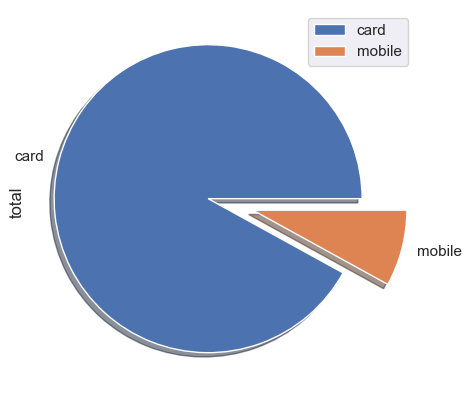

In [171]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT trd.trans_type, COUNT(id.item_name) " \
              "FROM star_schema.fact_table f " \
              "JOIN star_schema.item_dim id on id.item_key=f.item_key " \
                "JOIN star_schema.time_dim td on td.time_key=f.time_key " \
                "JOIN star_schema.trans_dim trd on trd.payment_key=f.payment_key " \
                "WHERE (trd.trans_type = 'card' OR trd.trans_type = 'mobile') "\
                "AND td.t_date BETWEEN (CURRENT_DATE - INTERVAL '%s day') AND CURRENT_DATE "\
                "GROUP BY trd.trans_type"
cur.execute(select_stmt,[x])
records = cur.fetchall()
df = pd.DataFrame(records, columns=['trans_type','total'])
df = df.dropna()
#df
df=df.set_index(['trans_type'])
#myexplode=[0.1,0.2]
df.plot.pie(y='total',figsize=(5,5),shadow=True,explode=myexplode)

# Q8: What season(quarter) is the worst for each product item? As example,

       item1-> q1

       item2-> q2

In [179]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT id.item_name,td.quarter, SUM(f.quantity) " \
              "FROM star_schema.fact_table f " \
              "JOIN star_schema.item_dim id on id.item_key=f.item_key " \
                "JOIN star_schema.time_dim td on td.time_key=f.time_key " \
                "GROUP BY CUBE(id.item_name,td.quarter) " \
                "ORDER BY id.item_name,SUM(f.quantity) ASC"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('100% Juice Box Variety 6.75 oz ', 'Q1', Decimal('5698')),
 ('100% Juice Box Variety 6.75 oz ', 'Q4', Decimal('5806')),
 ('100% Juice Box Variety 6.75 oz ', 'Q2', Decimal('5876')),
 ('100% Juice Box Variety 6.75 oz ', 'Q3', Decimal('6045')),
 ('100% Juice Box Variety 6.75 oz ', None, Decimal('23425')),
 ('A&W Root Beer - 12 oz cans', 'Q2', Decimal('5735')),
 ('A&W Root Beer - 12 oz cans', 'Q4', Decimal('5820')),
 ('A&W Root Beer - 12 oz cans', 'Q1', Decimal('5965')),
 ('A&W Root Beer - 12 oz cans', 'Q3', Decimal('6103')),
 ('A&W Root Beer - 12 oz cans', None, Decimal('23623')),
 ('A&W Root Beer Diet - 12 oz cans', 'Q4', Decimal('5589')),
 ('A&W Root Beer Diet - 12 oz cans', 'Q2', Decimal('5627')),
 ('A&W Root Beer Diet - 12 oz cans', 'Q3', Decimal('5940')),
 ('A&W Root Beer Diet - 12 oz cans', 'Q1', Decimal('6026')),
 ('A&W Root Beer Diet - 12 oz cans', None, Decimal('23182')),
 ('Advil 2 pill packets', 'Q1', Decimal('5453')),
 ('Advil 2 pill packets', 'Q3', Decimal('5647')),
 ('Advi

In [182]:
df = pd.DataFrame(records, columns=['item','quarter', 'quantity'])
df = df.dropna()
worst=df.groupby('item').head(1)
worst.head(20)

,item,quarter,quantity
0,100% Juice Box Variety 6.75 oz,Q1,5698
5,A&W Root Beer - 12 oz cans,Q2,5735
10,A&W Root Beer Diet - 12 oz cans,Q4,5589
15,Advil 2 pill packets,Q1,5453
20,All Purpose Cleaner 409 Spray,Q1,5325
25,Altoids Small Packs Variety,Q3,5466
30,Apple Sauce Variety GoGO Squeeze 3.2oz,Q4,5585
35,AquaFina Purified Drinking Water 16oz,Q1,5299
40,Austin Cookie Cracker Variety,Q1,5597
45,Austin Toasty Crackers w/ PBtr,Q2,5274


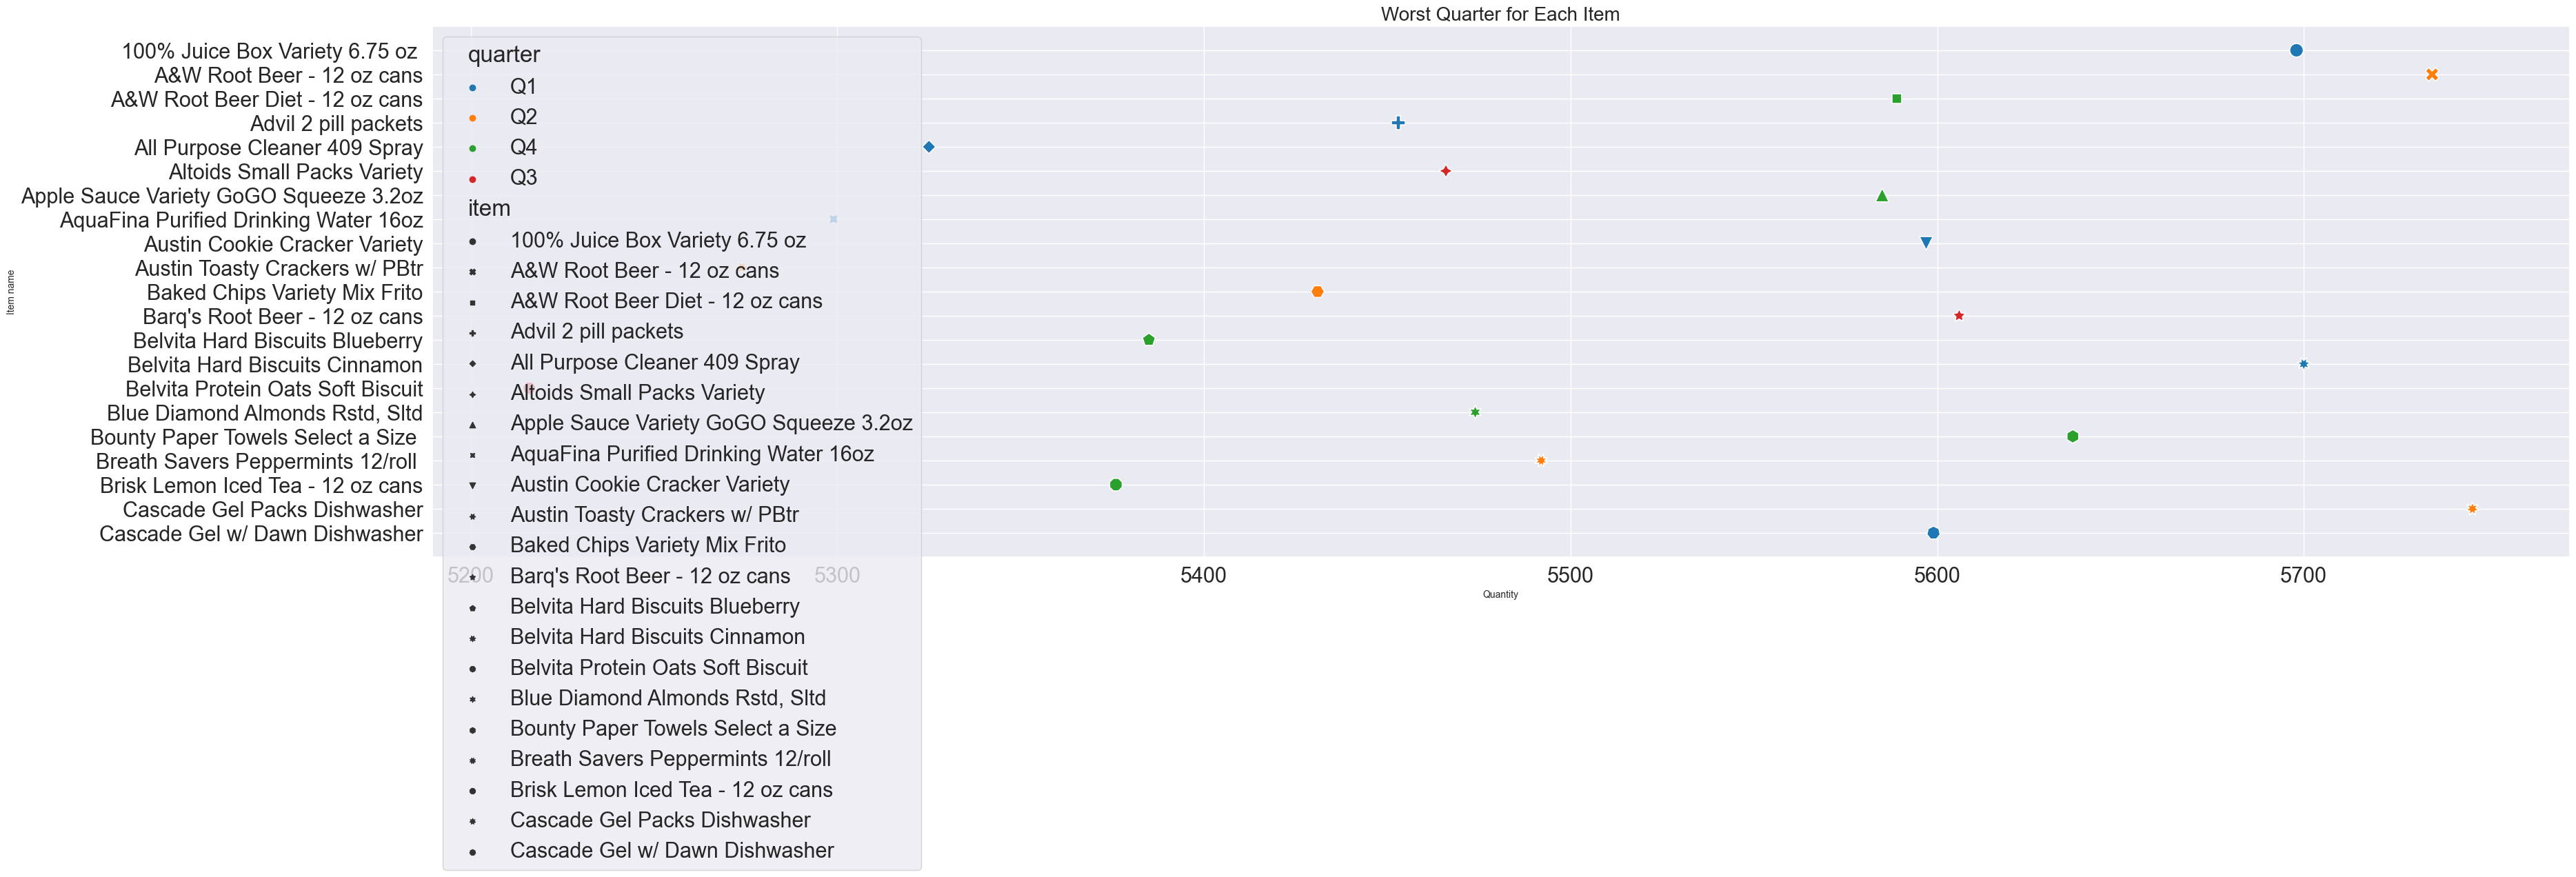

In [187]:
top_=worst[0:21]
plt.figure(figsize=(40,10))
plt.title('Worst Quarter for Each Item',fontsize=20)
plt.ylabel('Item name',fontsize=10)
plt.xlabel('Quantity',fontsize=10)
sns.scatterplot(data=top_,x="quantity",y="item",hue="quarter",palette="tab10",s=200,style="item")
sns.set(font_scale=2)

<Axes: title={'center': 'Worst Season for Each Item'}, xlabel='item', ylabel='quantity'>

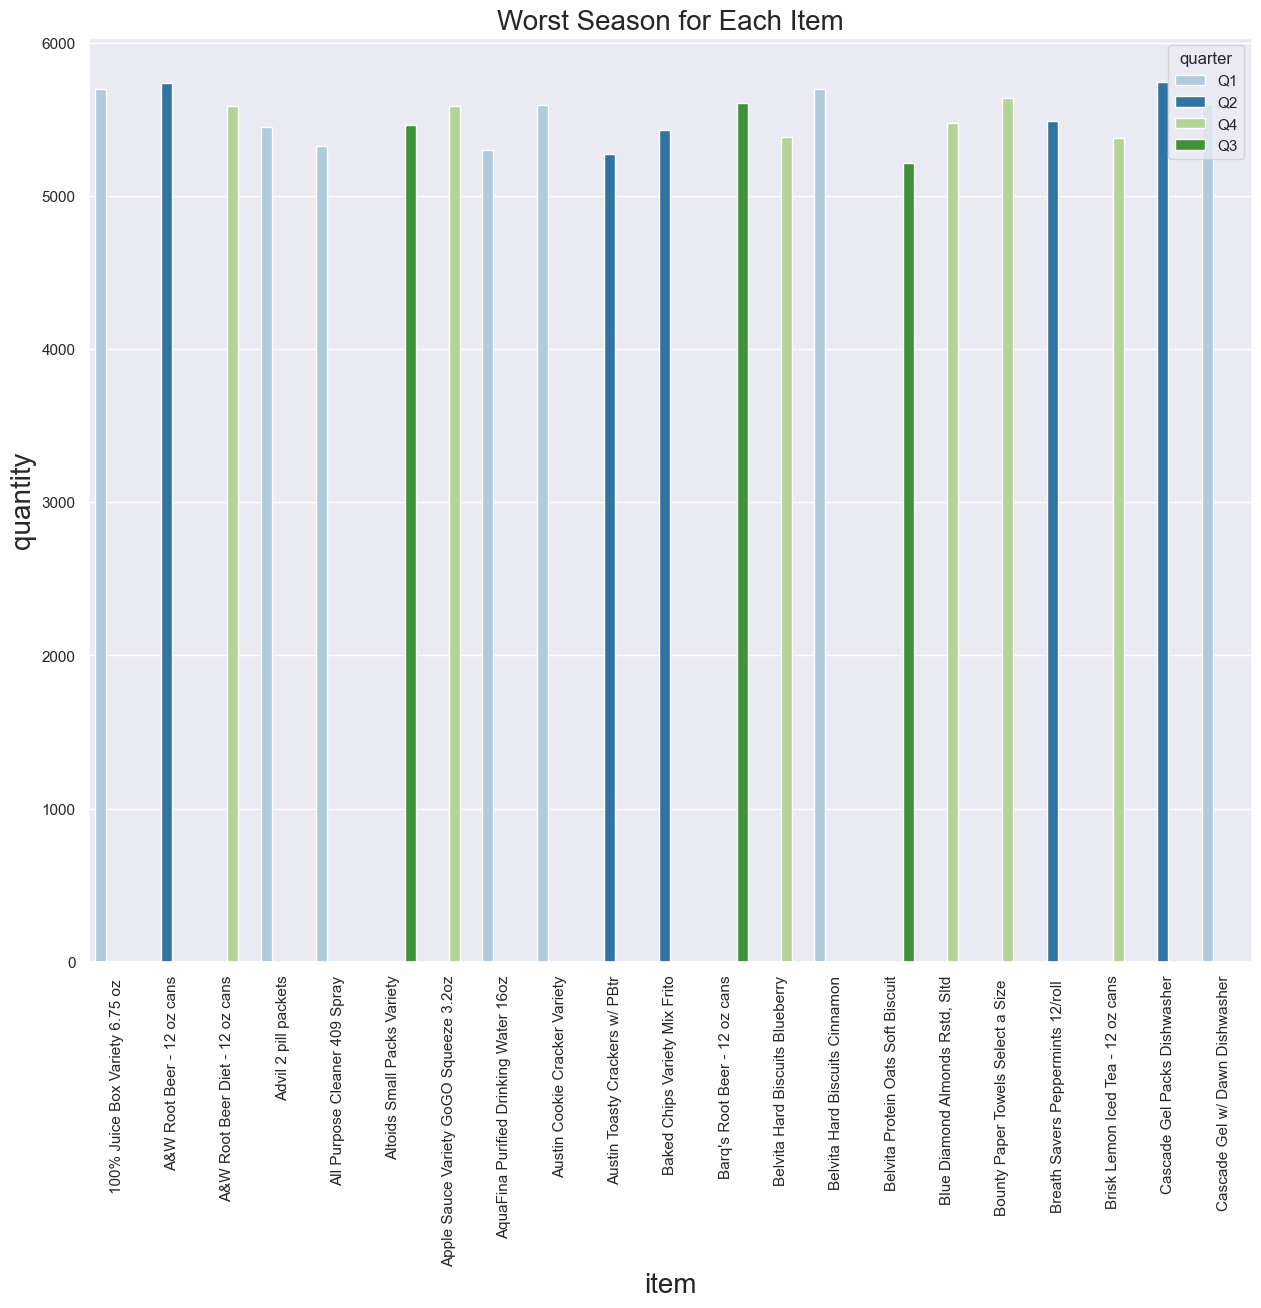

In [189]:
a_dims=(15,12)
fig,ax=plt.subplots(figsize=a_dims)
sns.set(font_scale=3)
sns.set_context("notebook")
plt.title('Worst Season for Each Item',fontsize=20)
plt.ylabel('item',fontsize=20)
plt.xlabel('Quantity',fontsize=20)
plt.xticks(rotation=90)
sns.barplot(x=top_['item'],y=top_['quantity'],hue=top_['quarter'],ax=ax,palette='Paired')

# Q9: Break down the total sales of items geographically (division-wise).

     item1-> division1->total_sales

     item1-> division2->total_sales

In [200]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT id.item_name,sd.division, SUM(f.total_price) " \
              "FROM star_schema.fact_table f " \
              "JOIN star_schema.item_dim id on id.item_key=f.item_key " \
                "JOIN star_schema.store_dim sd on sd.store_key=f.store_key " \
                "GROUP BY CUBE(id.item_name,sd.division) "\
                "ORDER BY id.item_name"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('100% Juice Box Variety 6.75 oz ', 'KHULNA', Decimal('37755.0')),
 ('100% Juice Box Variety 6.75 oz ', None, Decimal('351375.0')),
 ('100% Juice Box Variety 6.75 oz ', 'BARISAL', Decimal('23790.0')),
 ('100% Juice Box Variety 6.75 oz ', 'SYLHET', Decimal('18270.0')),
 ('100% Juice Box Variety 6.75 oz ', 'CHITTAGONG', Decimal('64950.0')),
 ('100% Juice Box Variety 6.75 oz ', 'RAJSHAHI', Decimal('38730.0')),
 ('100% Juice Box Variety 6.75 oz ', 'RANGPUR', Decimal('26685.0')),
 ('100% Juice Box Variety 6.75 oz ', 'DHAKA', Decimal('141195.0')),
 ('A&W Root Beer - 12 oz cans', 'DHAKA', Decimal('107479.0')),
 ('A&W Root Beer - 12 oz cans', 'BARISAL', Decimal('19101.5')),
 ('A&W Root Beer - 12 oz cans', 'CHITTAGONG', Decimal('52060.5')),
 ('A&W Root Beer - 12 oz cans', 'SYLHET', Decimal('15249.0')),
 ('A&W Root Beer - 12 oz cans', None, Decimal('271664.5')),
 ('A&W Root Beer - 12 oz cans', 'RANGPUR', Decimal('21597.0')),
 ('A&W Root Beer - 12 oz cans', 'KHULNA', Decimal('28382.0')),
 ('A&W 

In [201]:
df = pd.DataFrame(records, columns=['item','division', 'sales'])
df = df.dropna()

<Axes: title={'center': 'Division wise Item Sales'}, xlabel='sales', ylabel='item'>

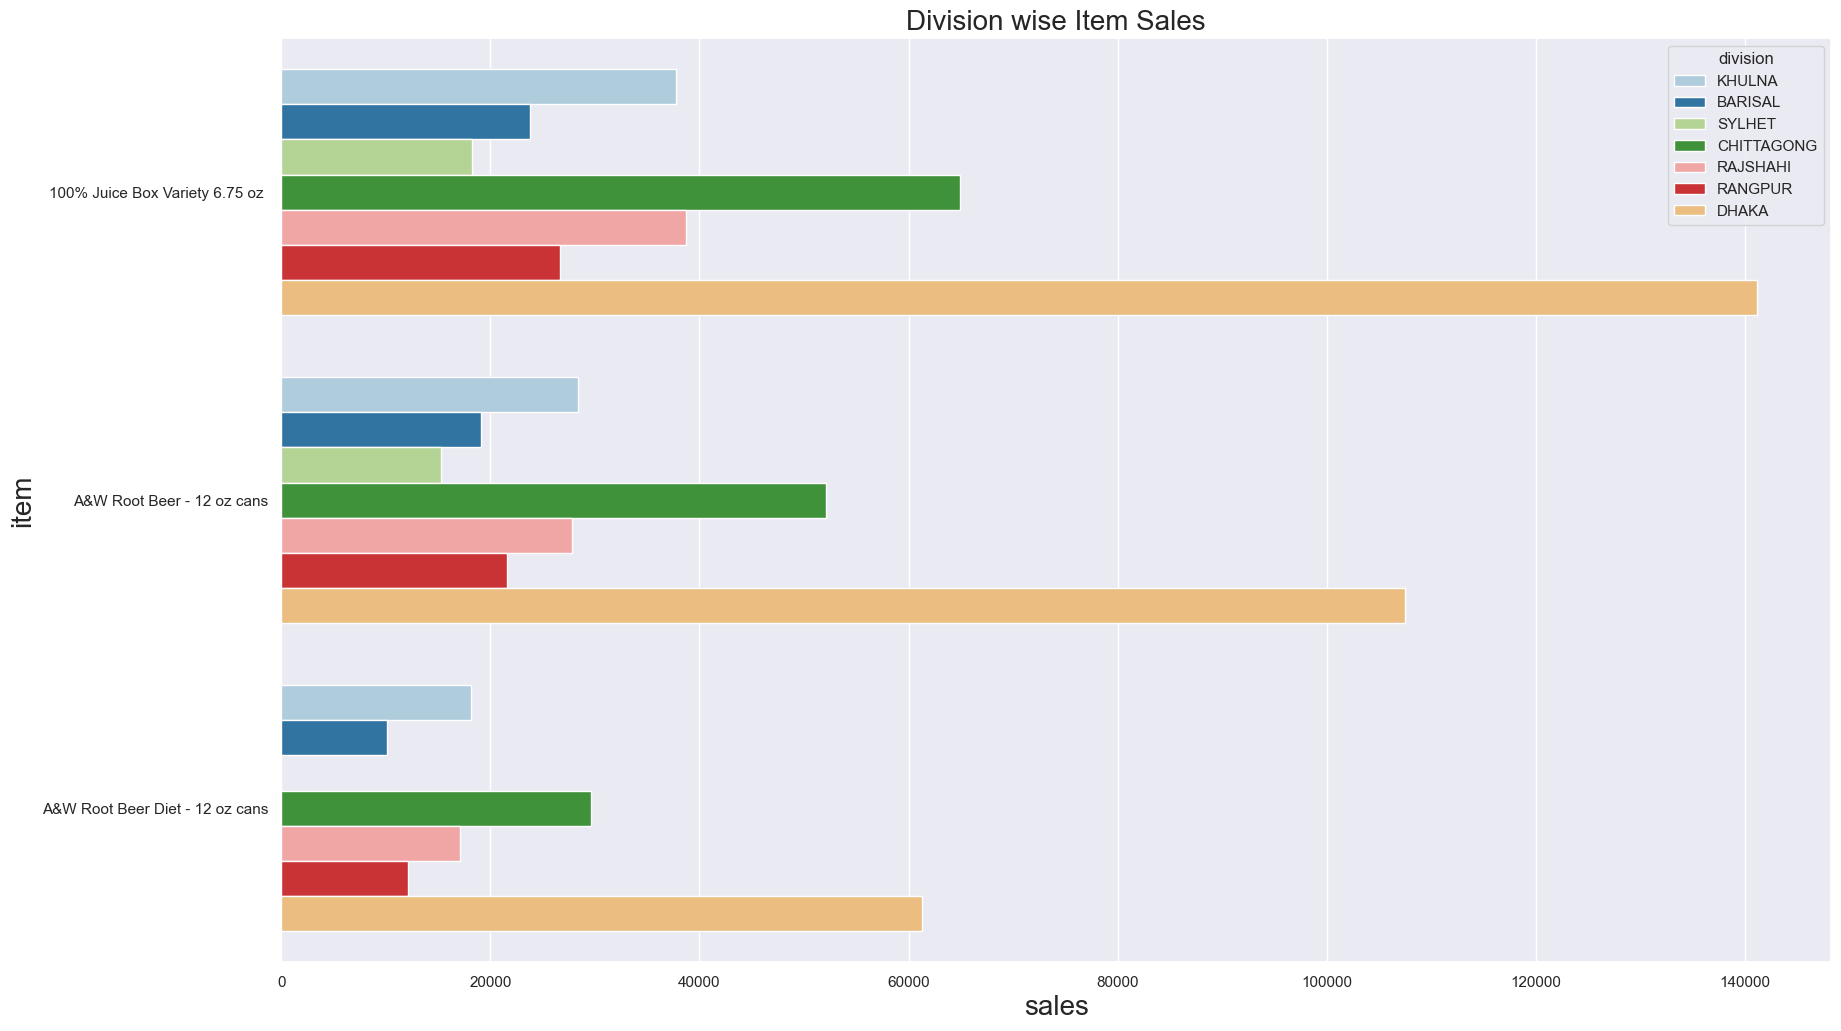

In [203]:
df=df[0:20]
a_dims=(20,12)
fig,ax=plt.subplots(figsize=a_dims)
plt.title('Division wise Item Sales',fontsize=20)
plt.ylabel('Sales',fontsize=20)
plt.xlabel('Item_name',fontsize=20)
#plt.xticks(rotation=90)
sns.barplot(x=df['sales'],y=df['item'],hue=df['division'],ax=ax,palette='Paired')

# Q10: What are the average sales of products sales per store monthly?

     S1->M1-> avg_sales

           s1-> M2 -> avg_sales

In [208]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT sd.store_key,td.month, AVG(f.total_price) " \
              "FROM star_schema.fact_table f " \
              "JOIN star_schema.time_dim td on td.time_key=f.time_key " \
                "JOIN star_schema.store_dim sd on sd.store_key=f.store_key " \
                "GROUP BY CUBE(sd.store_key,td.month) "\
                "ORDER BY sd.store_key,td.month ASC"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('S0001', 1, Decimal('97.7543103448275862')),
 ('S0001', 2, Decimal('100.5776699029126214')),
 ('S0001', 3, Decimal('109.4158878504672897')),
 ('S0001', 4, Decimal('98.8805309734513274')),
 ('S0001', 5, Decimal('99.5245535714285714')),
 ('S0001', 6, Decimal('101.2459349593495935')),
 ('S0001', 7, Decimal('103.9189189189189189')),
 ('S0001', 8, Decimal('105.1269531250000000')),
 ('S0001', 9, Decimal('96.1901041666666667')),
 ('S0001', 10, Decimal('104.6166666666666667')),
 ('S0001', 11, Decimal('103.8355855855855856')),
 ('S0001', 12, Decimal('107.8697478991596639')),
 ('S0001', None, Decimal('102.5407569141193595')),
 ('S0002', 1, Decimal('98.2902684563758389')),
 ('S0002', 2, Decimal('106.3849557522123894')),
 ('S0002', 3, Decimal('102.7565217391304348')),
 ('S0002', 4, Decimal('104.0798969072164948')),
 ('S0002', 5, Decimal('109.1587591240875912')),
 ('S0002', 6, Decimal('100.9268867924528302')),
 ('S0002', 7, Decimal('95.6513157894736842')),
 ('S0002', 8, Decimal('108.9462809917355

In [209]:
df = pd.DataFrame(records, columns=['store','month', 'average_sales'])
df = df.dropna()

<Axes: title={'center': 'Division wise Item Sales'}, xlabel='average_sales', ylabel='store'>

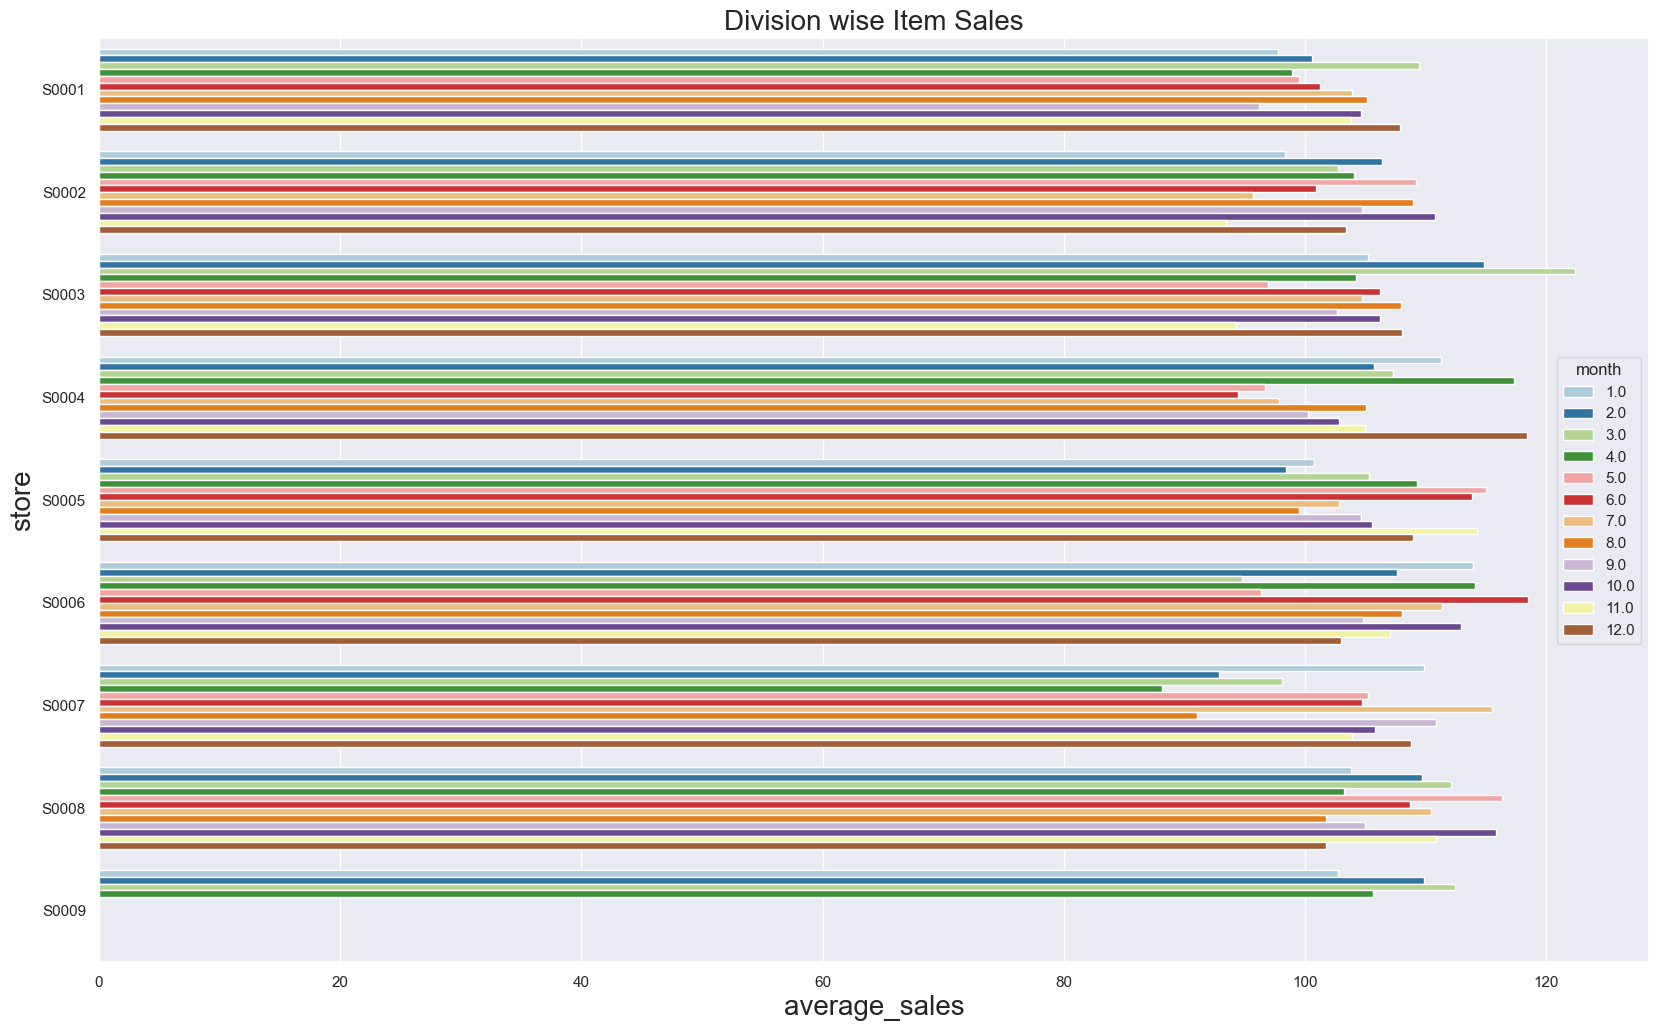

In [212]:
df=df[0:100]
a_dims=(20,12)
fig,ax=plt.subplots(figsize=a_dims)
plt.title('Division wise Item Sales',fontsize=20)
plt.ylabel('Sales',fontsize=20)
plt.xlabel('Item_name',fontsize=20)
#plt.xticks(rotation=90)
sns.barplot(y=df['store'],x=df['average_sales'],hue=df['month'],ax=ax,palette='Paired')